In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

PROJECT_DIR = "./cat-dogs-part2"
DATA_DIR = PROJECT_DIR + "/PetImages"
CATEGORIES = ["Dog", "Cat"]


In [2]:
training_data = []
IM_SIZE = 50

def create_training_data():
    for category in CATEGORIES:                
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IM_SIZE, IM_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                # print(f"broken image: {path}/{img}")
            
    print("Created training data!")
    

create_training_data()

Created training data!


Random animal:


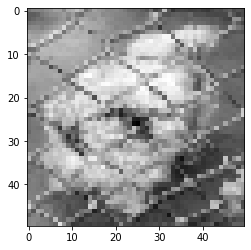

In [3]:
# Balance data 50% cat and 50% dogs if possible
# Shuffle data!
import random

random.shuffle(training_data)
plt.imshow(training_data[0][0], cmap='gray')
print("Random animal:")
plt.show()

In [4]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IM_SIZE, IM_SIZE, 1)  # 


In [5]:
np.save(PROJECT_DIR + "/training_X.npy", X)
np.save(PROJECT_DIR + "/training_y.npy", y)

In [6]:
X = np.load(PROJECT_DIR + "/training_X.npy")
y = np.load(PROJECT_DIR + "/training_y.npy")

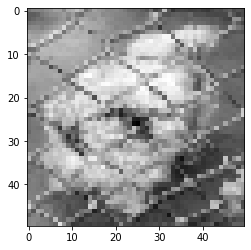

(24946, 50, 50, 1)
(24946,)


In [7]:
plt.imshow(X[0][:, :, 0], cmap='gray')
plt.show()

print(X.shape)
print(y.shape)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = tf.keras.utils.normalize(X, axis=1)
# X = X / 255.0

model = Sequential()
# Input layer
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())
model.add(Dense(64))

# Output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])




In [22]:
model.fit(X, y, batch_size=64, validation_split=0.8, epochs=3)
val_loss, val_accuracy = model.evaluate(X, y)

print()
print(f"Loss: {val_loss:>5.5f}")
print(f"Accuracy: {val_accuracy:>5.5f}")

Train on 4989 samples, validate on 19957 samples
Epoch 1/3
4989/4989 [==============================] - 28s 6ms/sample - loss: 0.4313 - accuracy: 0.7935 - val_loss: 0.4792 - val_accuracy: 0.7799
Epoch 2/3
4989/4989 [==============================] - 27s 5ms/sample - loss: 0.4133 - accuracy: 0.8068 - val_loss: 0.5022 - val_accuracy: 0.7668
Epoch 3/3
24946/24946 [==============================] - 23s 933us/sample - loss: 0.5046 - accuracy: 0.7664

Loss: 0.50462
Accuracy: 0.76642
